# Lecture 3: Linear Regression


## Types of machine learning algorithms

<img src='img/typesofml.jpg' />

### Supervised learning

Definition: Learning from labeled data, where the input-output pairs are provided.
Goal: Predict output values for new data.
Types:

* Regression: Predict continuous outputs.
        Example: Predicting house prices.
* Classification: Predict categorical outputs.
        Example: Email spam detection.
        
### Unsupervised learning

Definition: Learning from data that is not labeled, finding patterns or structure in the data.
Goal: Group data points, reduce data dimensions, or discover associations.
Types:

* Clustering: Group similar data points together.
        Example: Customer segmentation.
        
* Association: Find rules that describe large portions of the data.
        Example: Market basket analysis.
       
* Dimensionality Reduction: Limit the number of variables describing the data to minimum.
    
        Example: Decide which variables are the most important to predict who will buy certain products in a shop.

# Introduction to Linear Regression

### What is linear regression?
Linear regression is a statistical method used to model the relationship between one dependent variable (y) and one or more independent variables (x). The goal is to predict the value of the dependent variable based on the values of the independent variables.

### Application examples:
- **Predicting house prices**: Based on features such as area, number of rooms, and location.
- **Demand analysis**: Forecasting sales based on market trends.
- **Scientific research**: Analyzing the relationship between different variables in experimental studies.

### The goal of linear regression:
Linear regression allows for:
- Modeling the relationship between variables,
- Predicting the value of the dependent variable,
- Determining the extent to which independent variables influence the outcome.


# Theoretical Foundations of Linear Regression

### Regression line equation:
Linear regression describes the relationship between the dependent variable (y) and the independent variable (x) using the equation:

$$
y = \beta_0 + \beta_1 x
$$

Where:
- **y** – dependent variable (the value we want to predict),
- **x** – independent variable (feature),
- **β₀** – intercept (the y-axis intersection),
- **β₁** – slope coefficient (describes the change in y when x changes).

### Model parameters:
- **β₀ (intercept)**: the value of y when x = 0.
- **β₁ (slope)**: determines how much y changes with a unit change in x.

### Assumptions of linear regression:
1. **Linearity** – the relationship between the dependent and independent variables must be linear.
2. **Independence** – the observations must be independent of each other.
3. **Homoscedasticity** – the variance of residuals should be constant across all values of x.
4. **No multicollinearity** – there should be no strong correlation between independent variables (applies to multiple regression).



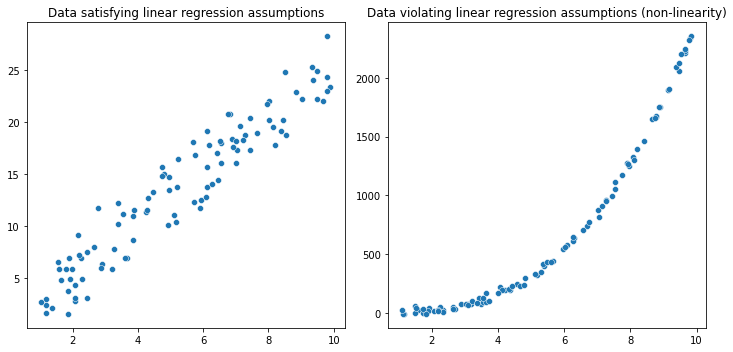

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Dataset that satisfies the assumptions of linear regression
np.random.seed(0)  # Setting a seed for reproducibility
x_good = np.random.uniform(1, 10, 100)  # Generating 100 random values uniformly distributed between 1 and 10
y_good = 2.5 * x_good + np.random.normal(0, 2, 100)  # Generating a linear relationship with some added noise

# Dataset that violates the assumptions of linear regression (non-linearity)
x_bad = np.random.uniform(1, 10, 100)  # Generating 100 random values uniformly distributed between 1 and 10
y_bad = 2.5 * x_bad**3 + np.random.normal(4, 22, 100)  # Generating a non-linear relationship (cubic) with noise

# Creating subplots to display both datasets side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, figure size of 10x5 inches

# Plotting the dataset that satisfies linear regression assumptions
sns.scatterplot(x=x_good, y=y_good, ax=axs[0])  # Scatterplot showing the linear data
axs[0].set_title("Data satisfying linear regression assumptions")  # Title for the first plot

# Plotting the dataset that violates linear regression assumptions (non-linearity)
sns.scatterplot(x=x_bad, y=y_bad, ax=axs[1])  # Scatterplot showing the non-linear data
axs[1].set_title("Data violating linear regression assumptions (non-linearity)")  # Title for the second plot

# Adjust layout for better spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Enable interactive mode for updating plots dynamically
%matplotlib notebook

# Generating data that is homoskedastic (variance of residuals is constant)
np.random.seed(0)  # Ensuring the randomness is reproducible
x = np.random.uniform(1, 10, 1000)  # Generating 1000 random x values between 1 and 10
y_good = 2.5 * x + np.random.normal(0, 2, 1000)  # Creating a linear relation with constant noise (homoskedasticity)

# Function to generate data with heteroskedasticity (variance depends on x)
def generate_data(heteroskedasticity_factor):
    y_bad = 2.5 * x + np.random.normal(0, heteroskedasticity_factor * x, 1000)  # Adding noise proportional to x (heteroskedasticity)
    return y_bad

# Create the figure and plot the initial dataset
fig, ax = plt.subplots(figsize=(8, 6))  # Setting up a plot with an 8x6 inch figure
plt.subplots_adjust(left=0.1, bottom=0.25)  # Adjusting the plot layout to make space for the slider
line, = plt.plot(x, y_good, 'o', label='Good data (Homoskedasticity)')  # Initial scatter plot showing homoskedastic data
plt.title("Homoskedasticity")  # Title of the plot

# Adding a slider to adjust heteroskedasticity dynamically
ax_hetero = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')  # Positioning the slider below the plot
hetero_slider = Slider(ax_hetero, 'Heteroskedasticity', 0.1, 1.0, valinit=1.0)  # Creating a slider with values ranging from 0.1 to 1.0

# Update function to change the data as the slider is moved
def update(val):
    line.set_ydata(generate_data(hetero_slider.val))  # Update the y-data based on the slider's current value
    fig.canvas.draw_idle()  # Redraw the figure to reflect the updated data

# Call the update function when the slider value changes
hetero_slider.on_changed(update)

# Display the plot with a legend
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Regression Line Equation:
Linear regression describes the relationship between the dependent variable (y) and the independent variable (x) using the equation:

$$
y = \beta_0 + \beta_1 x
$$

Where:
- **y** – dependent variable (the value we want to predict),
- **x** – independent variable (feature),
- **β₀** – intercept (the y-axis intersection),
- **β₁** – slope coefficient (describes the change in y when x changes).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from sklearn.linear_model import LinearRegression

# Enable interactive mode
%matplotlib notebook

# Generating initial data
np.random.seed(0)
x_full = np.random.uniform(1, 10, 100)
b0 = np.random.normal(0, 2, 100)
y_full = 2.5 * x_full + b0

# Linear regression model
def fit_regression(x, y):
    model = LinearRegression()
    x_reshaped = x.reshape(-1, 1)  # Reshaping for sklearn
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    return y_pred, model.coef_[0], model.intercept_

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)

# Plot the initial subset of points and regression line
line_data, = plt.plot(x_full, y_full, 'o', label='Data points')
y_pred, slope, intercept = fit_regression(x_full, y_full)
line_regression, = plt.plot(x_full, y_pred, label='Regression Line')

# Display the regression equation
text_eq = ax.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}', 
                  transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.title("Interactive Linear Regression")
plt.xlabel("x")
plt.ylabel("y")

# Add a slider for adjusting the number of data points
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
points_slider = Slider(ax_slider, 'Number of Points', 2, 100, valinit=2, valstep=1)

# Update function for the slider
def update(val):
    num_points = int(points_slider.val)
    x_subset = x_full[:num_points]
    y_subset = y_full[:num_points]
    
    # Update data points and regression line
    line_data.set_data(x_subset, y_subset)
    y_pred, slope, intercept = fit_regression(x_subset, y_subset)
    line_regression.set_data(x_subset, y_pred)
    
    # Update the displayed regression equation
    text_eq.set_text(f'y = {slope:.2f}x + {intercept:.2f}')
    
    ax.relim()
#     ax.autoscale_view()
    fig.canvas.draw_idle()

# Call the update function when the slider value changes
points_slider.on_changed(update)

# Display the plot
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# Linear Regression Algorithm

### Least Squares Method:
Linear regression uses the **least squares method** to optimize the regression line. The goal is to minimize the sum of the squares of the differences between the actual and predicted values.

### Steps of the Algorithm:
1. **Calculating the Error**: The difference between the actual value of y and the predicted value of y_hat.

   $$
   \text{error} = y - \hat{y}
   $$

2. **Squared Error**: The error squared:
    
    $$
   \text{squared error} = (y - \hat{y})^2
   $$

3. **Minimizing the Sum of Squared Errors**: The algorithm searches for the regression coefficients ($\beta_0$, $\beta_1$) that minimize the sum of squared errors.

   $$
   \text{SSE} = \sum (y - \hat{y})^2
   $$

### Interpretation of Coefficients:

- **$\beta_1$**: Indicates the change in the value of y for a unit change in x.
- **$\beta_0$**: The value of y when x = 0.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Enable interactive mode
%matplotlib notebook

# Generate synthetic data for linear regression
np.random.seed(0)
x = np.random.uniform(1, 10, 100)
y = 2.5 * x + np.random.normal(0, 2, 100)

# Initialize parameters
alpha = 0.01  # Learning rate
iterations = 100
m, b = 0, 0  # Initial slope and intercept

# Linear regression function for predicting y
def predict(x, m, b):
    return m * x + b

# Gradient descent to optimize m and b
def gradient_descent(x, y, m, b, learning_rate, num_iterations):
    N = len(y)
    for i in range(num_iterations):
        y_pred = predict(x, m, b)
        m_gradient = -(2/N) * np.sum(x * (y - y_pred))
        b_gradient = -(2/N) * np.sum(y - y_pred)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
        sse = np.sum((y - y_pred) ** 2)  # Calculate SSE (sum of squared errors)
        if i % 1 == 0:  # Plot every 50 iterations for smoother animation
            yield m, b, sse

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)
scat = plt.scatter(x, y, label='Data points')
line, = plt.plot(x, predict(x, m, b), label='Regression Line', color='red')
plt.title("Interactive Linear Regression with Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")

# Display the sum of squared errors (SSE) in the plot
text_sse = ax.text(0.05, 0.95, f'SSE: {np.sum((y - predict(x, m, b)) ** 2):.2f}', 
                   transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Add a slider for adjusting the number of iterations
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
iter_slider = Slider(ax_slider, 'Iterations', 1, 100, valinit=1, valstep=1)

# Update function to show regression optimization and update SSE
def update(val):
    num_iterations = int(iter_slider.val)
    for m_opt, b_opt, sse_opt in gradient_descent(x, y, m, b, alpha, num_iterations):
        line.set_ydata(predict(x, m_opt, b_opt))
        text_sse.set_text(f'SSE: {sse_opt:.2f}')
#         ax.relim()
#         ax.autoscale_view()
        fig.canvas.draw_idle()

# Call the update function when the slider value changes
iter_slider.on_changed(update)

# Display the plot
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# Numerical Example of Linear Regression: Predicting House Prices

### Data:

Let's consider a simple example where we want to predict house prices based on their area. We have the following data:

| Area (m²) | Price (thousands PLN) |
|-----------|-----------------------|
| 50        | 150                   |
| 60        | 180                   |
| 80        | 200                   |
| 100       | 220                   |
| 120       | 260                   |


In [5]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Data (area in square meters and house prices in thousands PLN)
x = np.array([50, 60, 80, 100, 120, 140]).reshape(-1, 1)  # Reshaping x data into a column vector
y = np.array([150, 180, 200, 220, 260, 300])  # House prices corresponding to the areas


In [6]:
%matplotlib inline
plt.scatter(x,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Creating LinearRegression model
model = LinearRegression()

In [8]:
# Fitting model
model.fit(x, y)

LinearRegression()

In [9]:
# Slope Coefficient (β₁) and Intercept (β₀)
beta_1 = model.coef_[0]
beta_0 = model.intercept_
print(beta_1,beta_0)

1.5479452054794525 76.43835616438352


In [10]:
# Function to Predict Prices for New Area Values
def predict(x_val):
    return model.predict(np.array(x_val).reshape(-1, 1))

In [11]:
# Predicting Prices for Given Values of x

y_pred = predict(x)

In [12]:
# Calculating R² i MSE
r2 = r2_score(y, y_pred)
mse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,mse)

NameError: name 'r2_score' is not defined

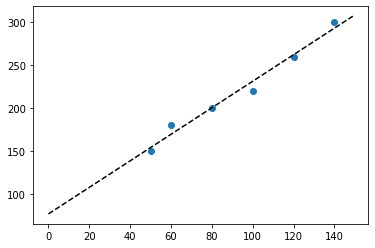

In [15]:
plt.scatter(x,y)
plt.plot(np.arange(0,150),[beta_1*z + beta_0 for z in np.arange(0,150)],
        c='k',ls='--')

array([153.83561644, 169.31506849, 200.2739726 , 231.23287671,
       262.19178082, 293.15068493])

# Evaluation of Regression Model Quality

### Coefficient of Determination (R²)
- **R²** measures the proportion of variance in the dependent variable that is explained by the model.
- Range of values: from 0 to 1.
- Formula:
  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$
  where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $\bar{y}$ is the mean of the actual data.

- **Interpretation:**
  - R² = 1: The model is perfectly fitted.
  - R² = 0: The model does not explain any variability in the data.
  
### Mean Absolute Error (MAE)
- **MAE** measures the average difference between predicted and actual values.
- Formula:
  $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$
- **Interpretation:**
  - The smaller the MAE value, the better the quality of the model. MAE indicates the average error of the model in the units of the data.

### Mean Squared Error (MSE)
- **MSE** measures the average squared difference between actual and predicted values.
- Formula:
  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
- **Interpretation:**
  - MSE is sensitive to large errors because it squares the errors, which amplifies their weight.
  
### Root Mean Squared Error (RMSE)
- **RMSE** is the square root of MSE. It is more interpretable because it restores the units of the data.
- Formula:
  $$
  RMSE = \sqrt{MSE}
  $$
- **Interpretation:**
  - The lower the RMSE, the better the model predicts the actual data.


# Optimization of Regression Using Stochastic Gradient Descent

### What is Stochastic Gradient Descent?
Stochastic gradient descent is an optimization method used in machine learning to minimize the cost function. In the case of linear regression, the goal is to minimize the prediction error, which is the difference between the predicted and actual values.

### Cost Function
For linear regression, we use a cost function called **Mean Squared Error (MSE)**:
$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value.


### Stochastic Gradient Descent (SGD)
In classical **Gradient Descent**, we use the entire dataset to compute the gradient. In **Stochastic Gradient Descent (SGD)**, we compute the gradient for one random sample at a time, making optimization faster and more efficient for large datasets.

### Visualization of Optimization
Stochastic gradient descent moves through the parameter space, striving to minimize the cost function. The regression parameters are gradually adjusted until the cost function reaches its minimum.


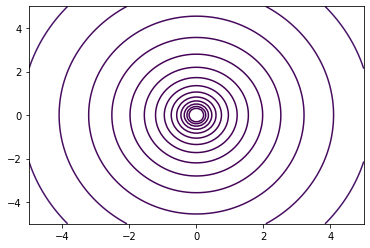

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Define the function (a simple quadratic bowl for this example)
def f(x, y):
    return 2*x**2 + y**2

# Gradient of the function
def grad_f(x, y):
    return np.array([4*x, 2*y])

# Stochastic Gradient Descent (SGD) with adjustable learning rate and iterations
def sgd(starting_point, learning_rate, iterations):
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    current_point = np.array(starting_point)
    
    for i in range(iterations):
        gradient = grad_f(current_point[0], current_point[1])
        current_point = current_point - learning_rate * gradient
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values

# Create a grid for the contour plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')

# Starting point and parameters for SGD
start_point = np.array([4, 4])
learning_rate = 0.1

# This function will update the plot for the animation
def update(iteration):
    ax.clear()
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    iterations = iteration + 1
    x_vals, y_vals = sgd(start_point, learning_rate, iterations)
    ax.plot(x_vals, y_vals, marker='o', color='red')
    ax.set_title(f"SGD Iteration: {iteratio|ns}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=50, interval=200)

# Show the plot
plt.show()


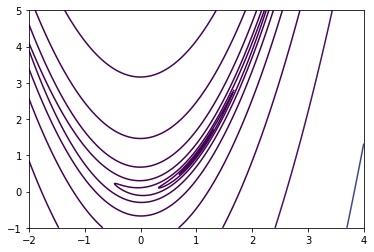

In [2]:
# Define a more complex cost function (Rosenbrock function)
def f_complex(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient of the more complex cost function
def grad_f_complex(x, y):
    grad_x = -2 * (1 - x) - 400 * x * (y - x**2)
    grad_y = 200 * (y - x**2)
    return np.array([grad_x, grad_y])

# Stochastic Gradient Descent (SGD) with the more complex cost function
def sgd_complex(starting_point, learning_rate, iterations):
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    current_point = np.array(starting_point)
    
    for i in range(iterations):
        gradient = grad_f_complex(current_point[0], current_point[1])
        current_point = current_point - learning_rate * gradient
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values

# Create a grid for the contour plot of the more complex function
x = np.linspace(-2, 4, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f_complex(X, Y)

# Set up the figure and axis for the more complex cost function
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.logspace(-1, 5, 10), cmap='viridis')

# This function will update the plot for the more complex function animation
def update_complex(iteration):
    ax.clear()
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    iterations = iteration + 1
    x_vals, y_vals = sgd_complex(start_point, learning_rate, iterations)
    ax.plot(x_vals, y_vals, marker='o', color='red')
    ax.set_title(f"SGD Iteration: {iterations} (Complex Function)")

# Create the animation for the more complex function
ani_complex = animation.FuncAnimation(fig, update_complex, frames=20, interval=200)

# Show the plot
plt.show()


# Multiple Linear Regression

### What is Multiple Regression?

Multiple regression is an extension of linear regression that allows for modeling the relationship between a dependent variable (outcome) and multiple independent variables (features). Instead of predicting the outcome based on a single feature, we use several features to create a more accurate model.

### Multiple Regression Equation

The equation for multiple regression takes the form:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

Where:
- $ \hat{y} $ is the predicted value,
- $ \beta_0 $ is the intercept,
- $ \beta_1, \beta_2, ..., \beta_n $ are the regression coefficients corresponding to the individual features $ x_1, x_2, ..., x_n $,
- $ x_1, x_2, ..., x_n $ are the values of the features (independent variables).

### Example:

Suppose we want to predict the price of a house based on several features: area (m²), number of rooms, and age of the house (in years). The multiple regression equation might look as follows:

$$
\hat{y} = \beta_0 + \beta_1 \cdot \text{area} + \beta_2 \cdot \text{number of rooms} + \beta_3 \cdot \text{age of the house}
$$

### Goals of Multiple Regression

Multiple regression allows for:
- Modeling the relationship between the dependent variable and multiple independent variables.
- Better prediction of the outcome value by considering various factors.
- Determining which variables have the greatest impact on the dependent variable.

### Assumptions of Multiple Regression

1. **Linearity** – It is assumed that there is a linear relationship between the dependent variable and the independent variables.
2. **No Multicollinearity** – Independent variables should not be strongly correlated with each other.
3. **Homoscedasticity** – The variance of the residuals should be constant for all values of the independent variables.
4. **Independence of Residuals** – The residuals (errors) should be independent of one another.

### Model Evaluation Metrics

1. **Coefficient of Determination (R²)** – Measures the proportion of variance in the dependent variable that is explained by the model.
2. **Mean Squared Error (MSE)** – The average squared difference between actual and predicted values.
3. **Adjusted R²** – Takes into account the number of variables in the model, penalizing the model for adding excessive variables that do not significantly improve predictions.

### Advantages of Multiple Regression:

- **Greater Accuracy**: Including multiple variables allows for more precise predictions.
- **Assessment of Variable Impact**: The model shows which features have the greatest influence on the outcome.

### Disadvantages of Multiple Regression:

- **Multicollinearity**: When independent variables are strongly correlated, it can lead to instability in the model.
- **Complexity**: As more variables are added, interpreting the results becomes more challenging.

---

Multiple regression is a powerful tool for modeling complex relationships, but it requires careful selection of variables and checking of model assumptions.


In [19]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import r2_score, mean_squared_error  # For model evaluation metrics

# Sample data (area in m², number of rooms, age of the house, and price in thousands PLN)
data = {
    'Area': [50, 60, 80, 100, 120],  # Area of the house
    'Number of rooms': [2, 3, 3, 4, 5],  # Number of rooms in the house
    'House age': [20, 15, 10, 5, 2],  # Age of the house in years
    'Price': [150, 180, 200, 220, 260]  # Price of the house in thousands PLN
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)  # Converting the dictionary into a pandas DataFrame for easier data manipulation

df

,Area,Number of rooms,House age,Price
0,50,2,20,150
1,60,3,15,180
2,80,3,10,200
3,100,4,5,220
4,120,5,2,260


In [20]:
# Independent variables (Area, Number of rooms, House age)
X = df[['Area', 'Number of rooms', 'House age']]  # Selecting multiple features from the DataFrame

# Dependent variable (Price)
y = df['Price']  # Selecting the target variable (Price) from the DataFrame



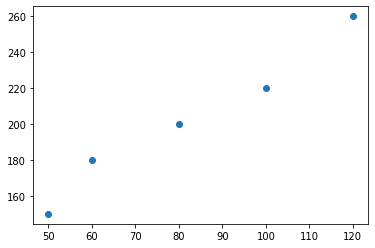

In [21]:
%matplotlib inline
plt.scatter(X['Area'],y)

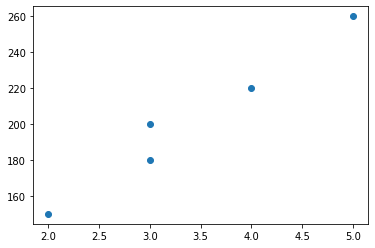

In [22]:
%matplotlib inline
plt.scatter(X['Number of rooms'],y)

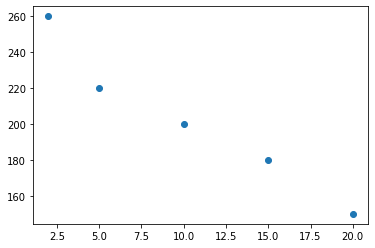

In [23]:
%matplotlib inline
plt.scatter(X['House age'],y)

In [24]:
# Creating Linear Regression model
model = LinearRegression()

In [25]:
# Fitting model to data
model.fit(X, y)

LinearRegression()

In [26]:
# Predicting prices for houses
y_pred = model.predict(X)

In [27]:
# Regression coefficients
beta_0 = model.intercept_
beta_1_2_3 = model.coef_
print(beta_0,beta_1_2_3)

109.88950276243075 [ 0.54143646 16.90607735 -0.93922652]


In [42]:
beta_1_2_3 = abs(beta_1_2_3)
beta_1_2_3/sum(beta_1_2_3)

array([0.02944712, 0.91947115, 0.05108173])

In [30]:
# Calculating R² i MSE
r2 = r2_score(y, y_pred)
mse = np.sqrt(mean_squared_error(y, y_pred))
print(r2,mse)

0.9869908775536426 4.230904452500416


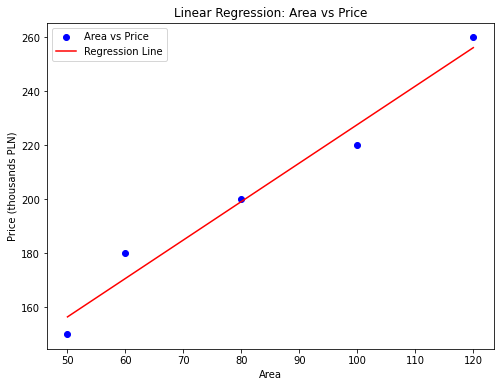

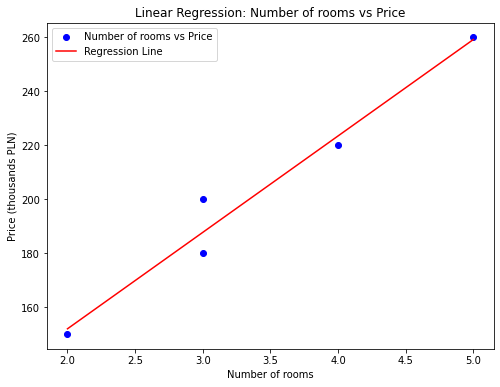

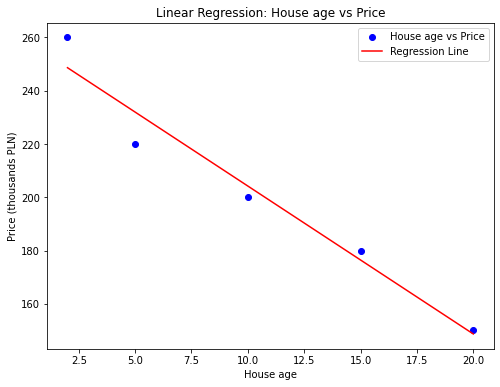

In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # Importing the linear regression model

# Sample data (area in m², number of rooms, house age, and price in thousands PLN)
data = {
    'Area': [50, 60, 80, 100, 120],  # Area of the house
    'Number of rooms': [2, 3, 3, 4, 5],  # Number of rooms in the house
    'House age': [20, 15, 10, 5, 2],  # Age of the house in years
    'Price': [150, 180, 200, 220, 260]  # Price of the house in thousands PLN
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)  # Converting the dictionary into a pandas DataFrame

# Dependent variable (Price)
y = df['Price']  # Selecting the target variable (Price) from the DataFrame

# Creating the linear regression model
model = LinearRegression()  # Initializing the linear regression model

# Function to create plots for regression lines
def plot_regression_line(feature, feature_name):
    X = df[[feature_name]]  # Selecting the feature column for regression
    
    # Fitting the model to one feature
    model.fit(X, y)  # Fitting the model using the feature and the dependent variable
    y_pred = model.predict(X)  # Predicting y values based on the fitted model
    
    # Creating the plot
    plt.figure(figsize=(8, 6))  # Setting the figure size for the plot
    plt.scatter(X, y, color='blue', label=f'{feature_name} vs Price')  # Scatter plot of the actual data
    plt.plot(X, y_pred, color='red', label='Regression Line')  # Plotting the regression line
    plt.xlabel(feature_name)  # Labeling the x-axis
    plt.ylabel('Price (thousands PLN)')  # Labeling the y-axis
    plt.title(f'Linear Regression: {feature_name} vs Price')  # Title for the plot
    plt.legend()  # Showing the legend for the plot
    plt.show()  # Displaying the plot

# Plot for each feature
plot_regression_line('Area', 'Area')  # Plotting for Area
plot_regression_line('Number of rooms', 'Number of rooms') 
plot_regression_line('House age', 'House age') 
